# 2019-03-18 Plotting Python Notebook

This plots graphs from **20190315-MNIST.py** and **20190315-MNIST-batch.py**.

In [79]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# check the files
os.listdir()

# Epochs array
EPOCHS = list(range(1,30,2))

def filename_nobatch(SIZE):
    return "20190316-without-batch-{}.p".format(SIZE)
def filename_batch(SIZE):
    return "20190316-with-batch-{}.p".format(SIZE)

SIZE_arr = [100, 200, 400, 800, 1600, 3200]

figsize = (20,10)

take_from = 10

columns = ['tf_only', 'tf_svm2', 'tf_svm4', 'tf_svm6']

# Without batch

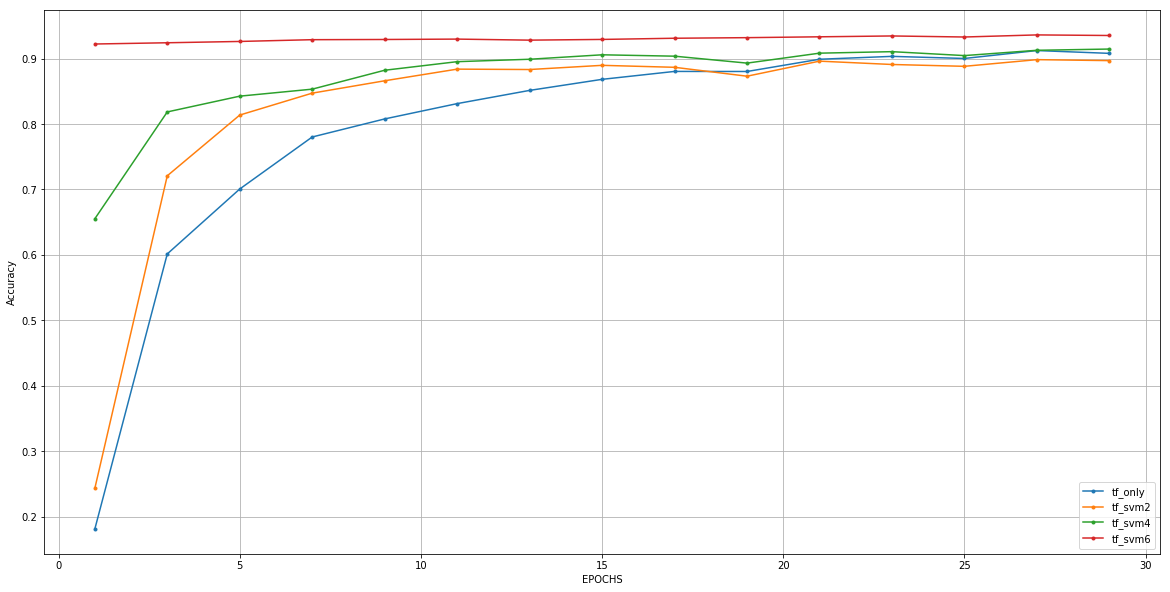

In [80]:
SIZE = 100

a = pickle.load(open(filename_nobatch(SIZE), "rb"))

plt.figure(figsize=figsize)
for i in a:
    plt.plot(EPOCHS, a[i],'.-', label=i)
    
plt.legend()
plt.grid()
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.show()

## Make Pandas Dataframe

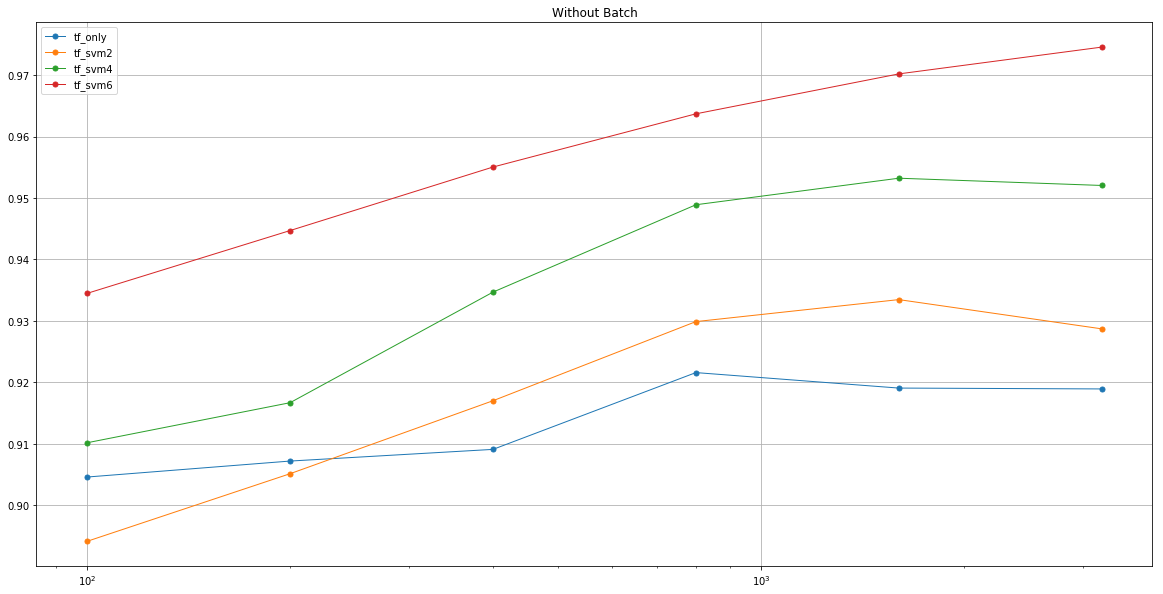

In [81]:
means = []
maxs = []
mins = []

for SIZE in SIZE_arr:
    a = pickle.load(open(filename_nobatch(SIZE), "rb"))
    tmp = []
    for i in a:
        tmp.append(np.mean(a[i][take_from:]))
    means.append(tmp)
    
    tmp = []
    for i in a:
        tmp.append(np.max(a[i][take_from:]))
    maxs.append(tmp)
    
    tmp = []
    for i in a:
        tmp.append(np.min(a[i][take_from:]))
    mins.append(tmp)

df_nobatch_mean = pd.DataFrame(means,columns=columns,index=SIZE_arr)
df_nobatch_max = pd.DataFrame(maxs,columns=columns,index=SIZE_arr)
df_nobatch_min = pd.DataFrame(mins,columns=columns,index=SIZE_arr)


ax = df_nobatch_mean.plot(lw=1, marker='.', markersize=10, 
         title='Without Batch', figsize=figsize, logx=True)

plt.grid()
plt.show()

# With Batch

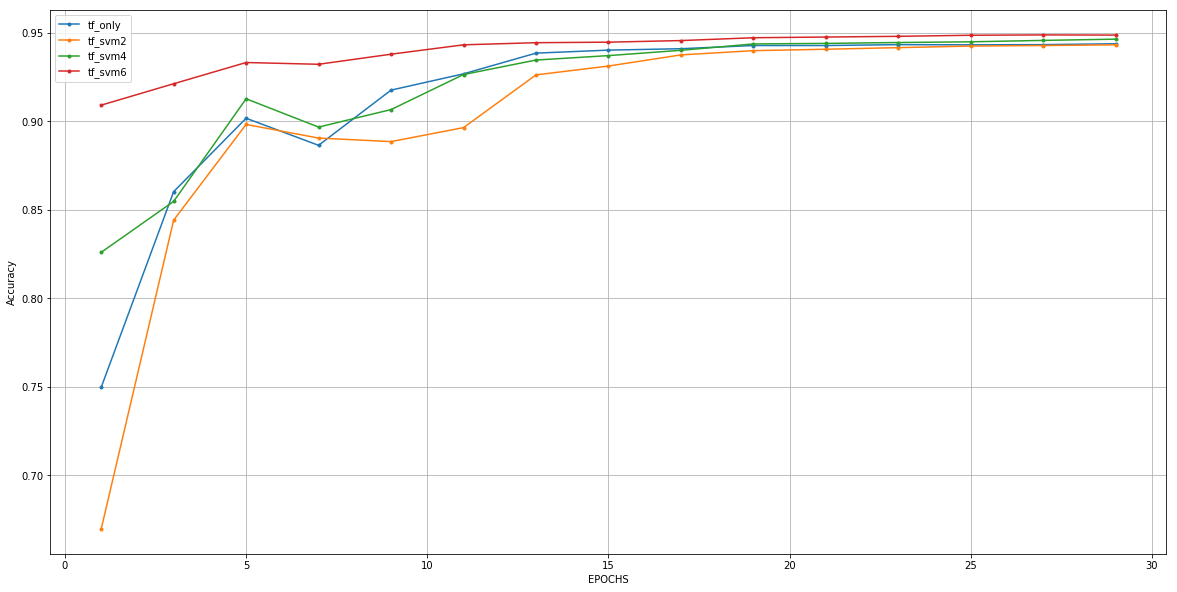

In [82]:
SIZE = 100

a = pickle.load(open(filename_batch(SIZE), "rb"))

plt.figure(figsize=figsize)
for i in a:
    plt.plot(EPOCHS, a[i],'.-', label=i)
    
plt.legend()
plt.grid()
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.show()

## Make Pandas Dataframe

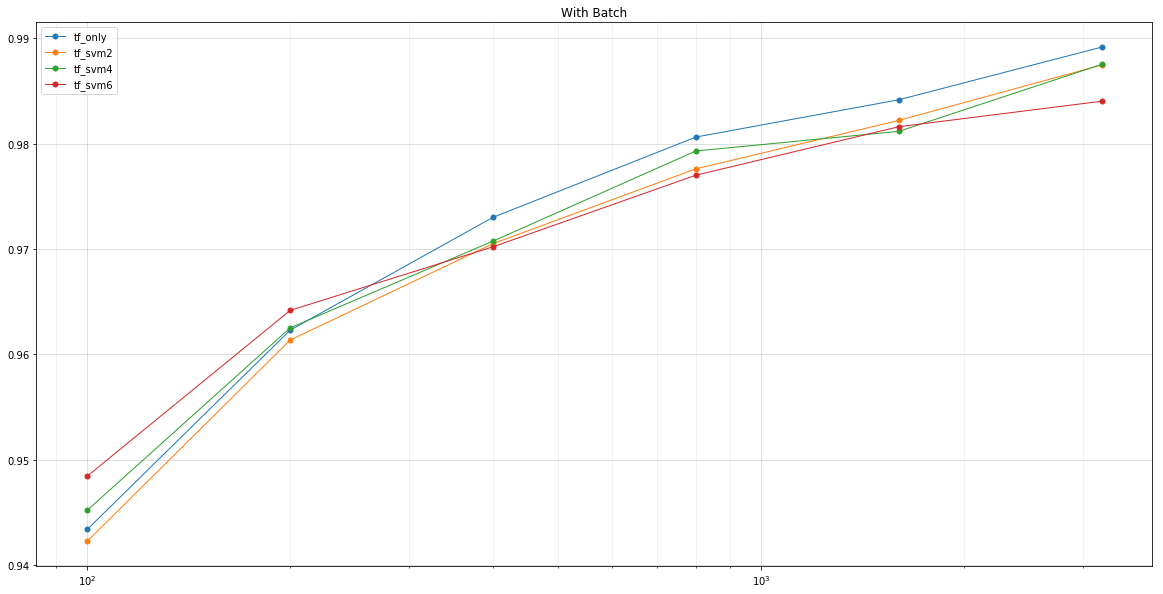

In [83]:
means = []
maxs = []
mins = []

for SIZE in SIZE_arr:
    a = pickle.load(open(filename_batch(SIZE), "rb"))
    tmp = []
    for i in a:
        tmp.append(np.mean(a[i][take_from:]))
    means.append(tmp)
    
    tmp = []
    for i in a:
        tmp.append(np.max(a[i][take_from:]))
    maxs.append(tmp)
    
    tmp = []
    for i in a:
        tmp.append(np.min(a[i][take_from:]))
    mins.append(tmp)

df_batch_mean = pd.DataFrame(means,columns=columns,index=SIZE_arr)
df_batch_max = pd.DataFrame(maxs,columns=columns,index=SIZE_arr)
df_batch_min = pd.DataFrame(mins,columns=columns,index=SIZE_arr)


ax = df_batch_mean.plot(lw=1, marker='.', markersize=10, 
         title='With Batch', figsize=figsize, logx=True)

# ax.set_xticklabels(SIZE_arr, rotation=0)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()